In [1]:
import numpy as np
import os
import pickle
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
import model
import evaluation
import preprocess
from collections import defaultdict
from IPython.display import display, Markdown

%matplotlib inline

模型cross validation 1次的时间大概在 4s 左右

In [2]:
X, y = preprocess.load_data()

In [3]:
models = {
    'DecisionTree': model.DecisionTree,
    'SVM': model.SVM,
    'LR': model.LinearModel,
    'XGBoost': model.XGBoost
}

## Model View

In [4]:
dfs_results = defaultdict(lambda: pd.DataFrame(columns=['f1', 'roc_auc']))

In [17]:
# 1m 39s
dfs_results = defaultdict(lambda: pd.DataFrame(columns=['f1', 'roc_auc']))
for name, md in models.items():
    for use_balanced_trick in (True, False):
        result = evaluation.cross_validation(md(balanced_learning=use_balanced_trick), X, y, scoring='both', n_jobs=-1)
        if use_balanced_trick:
            dfs_results['model_balance'].loc[name] = result['f1'].mean(), result['roc_auc'].mean()
        else:
            dfs_results['origin'].loc[name] = result['f1'].mean(), result['roc_auc'].mean()


**DecisionTree**

- f1: [ 0.74929044  0.78915136  0.77083333]

- roc_auc: [ 0.93961189  0.93417265  0.95057277]

**DecisionTree**

- f1: [ 0.86175115  0.86452947  0.86902287]

- roc_auc: [ 0.93106718  0.92889277  0.95147919]

**SVM**

- f1: [ 0.85683987  0.87559354  0.87451737]

- roc_auc: [ 0.97250295  0.97636243  0.97226812]

**SVM**

- f1: [ 0.86538462  0.86909871  0.88624052]

- roc_auc: [ 0.96116168  0.94883541  0.96080417]

**LR**

- f1: [ 0.82991803  0.86174242  0.86121673]

- roc_auc: [ 0.97443287  0.97791132  0.97780718]

**LR**

- f1: [ 0.87019231  0.86299892  0.88720174]

- roc_auc: [ 0.97303515  0.97701628  0.97736437]

**XGBoost**

- f1: [ 0.82604273  0.85451197  0.82320943]

- roc_auc: [ 0.97712153  0.97918636  0.97948504]

**XGBoost**

- f1: [ 0.87914692  0.88538381  0.90254237]

- roc_auc: [ 0.97633329  0.97876088  0.9801707 ]

# Data View

In [6]:
# 13min
sample_methods = {
    'smote': preprocess.get_smote('regular'),
    'sm_bl1': preprocess.get_smote('borderline1'),
    'sm_bl2': preprocess.get_smote('borderline2'),
    'sm_svm': preprocess.get_smote('svm'),
    'upsampling': preprocess.upsampling,
    'downsampling': preprocess.downsampling
}

df_sample = defaultdict(lambda: pd.DataFrame(columns=['f1', 'roc_auc']))
for name, md in models.items():
    for method_name, method in sample_methods.items():
        sample_ratios = (1, )
        if method_name.endswith('sampling'):
            sample_ratios = range(1, 10)
        for sample_ratio in sample_ratios:
            _model = md(balanced_learning=False, sample_method=method, sample_ratio=1 / sample_ratio)
            result = evaluation.cross_validation(_model, X, y, scoring='both', n_jobs=-1)
            
            _method_name = method_name + str(sample_ratio)
            display(Markdown("**{}_{}**".format(name, _method_name)))
            display(Markdown("- f1: {}".format(result['f1'])))
            display(Markdown("- roc_auc: {}".format(result['roc_auc'])))
            dfs_results[_method_name].loc[name] = result['f1'].mean(), result['roc_auc'].mean()



**DecisionTree_smote1**

- f1: [ 0.73863636  0.77651183  0.78700361]

- roc_auc: [ 0.94314298  0.93191883  0.94982109]

**DecisionTree_sm_bl11**

- f1: [ 0.77654196  0.78421053  0.79744526]

- roc_auc: [ 0.93070575  0.94295076  0.94787872]

**DecisionTree_sm_bl21**

- f1: [ 0.72067039  0.74399337  0.73350042]

- roc_auc: [ 0.9322612   0.93605127  0.94683142]

**DecisionTree_sm_svm1**

- f1: [ 0.80541103  0.82577132  0.81640261]

- roc_auc: [ 0.94110744  0.94318533  0.95146027]

**DecisionTree_upsampling1**

- f1: [ 0.80375783  0.82451253  0.80751174]

- roc_auc: [ 0.92502391  0.92471226  0.93224051]

**DecisionTree_upsampling2**

- f1: [ 0.80578512  0.83085502  0.81055608]

- roc_auc: [ 0.93264069  0.93016602  0.93310488]

**DecisionTree_upsampling3**

- f1: [ 0.79508197  0.82512077  0.80266921]

- roc_auc: [ 0.93584076  0.92285267  0.94031907]

**DecisionTree_upsampling4**

- f1: [ 0.82023681  0.82765336  0.82468168]

- roc_auc: [ 0.93450111  0.92022785  0.94676372]

**DecisionTree_upsampling5**

- f1: [ 0.8388521   0.84147557  0.85420945]

- roc_auc: [ 0.93705581  0.92568542  0.94490208]

**DecisionTree_upsampling6**

- f1: [ 0.83558559  0.84738956  0.85860656]

- roc_auc: [ 0.93622414  0.92624071  0.94660918]

**DecisionTree_upsampling7**

- f1: [ 0.84813084  0.85656155  0.85860656]

- roc_auc: [ 0.93266721  0.92793303  0.94451794]

**DecisionTree_upsampling8**

- f1: [ 0.84676504  0.86597938  0.85418821]

- roc_auc: [ 0.94038847  0.9279118   0.94846913]

**DecisionTree_upsampling9**

- f1: [ 0.85714286  0.85890834  0.86919831]

- roc_auc: [ 0.93741724  0.9361298   0.95012618]

**DecisionTree_downsampling1**

- f1: [ 0.67986231  0.71450617  0.70038314]

- roc_auc: [ 0.94831959  0.94813028  0.95371593]

**DecisionTree_downsampling2**

- f1: [ 0.79317269  0.82110912  0.78621908]

- roc_auc: [ 0.95120326  0.95418641  0.95269617]

**DecisionTree_downsampling3**

- f1: [ 0.79666319  0.83973758  0.8540856 ]

- roc_auc: [ 0.94990728  0.94157495  0.95829873]

**DecisionTree_downsampling4**

- f1: [ 0.8372093   0.84007707  0.82397716]

- roc_auc: [ 0.94734023  0.93643809  0.95201346]

**DecisionTree_downsampling5**

- f1: [ 0.84424379  0.83491461  0.85177866]

- roc_auc: [ 0.94710111  0.93839464  0.95809141]

**DecisionTree_downsampling6**

- f1: [ 0.85714286  0.86579213  0.87087087]

- roc_auc: [ 0.94383566  0.9361296   0.95790575]

**DecisionTree_downsampling7**

- f1: [ 0.8438914   0.86030151  0.87372709]

- roc_auc: [ 0.94008511  0.92738355  0.95391714]

**DecisionTree_downsampling8**

- f1: [ 0.84439359  0.84189325  0.8755102 ]

- roc_auc: [ 0.93784108  0.93356027  0.95225063]

**DecisionTree_downsampling9**

- f1: [ 0.86332574  0.85106383  0.88149688]

- roc_auc: [ 0.93991388  0.93617988  0.95393859]

**SVM_smote1**

- f1: [ 0.86140725  0.88252149  0.87790698]

- roc_auc: [ 0.97306442  0.97629792  0.97326895]

**SVM_sm_bl11**

- f1: [ 0.75317604  0.78934221  0.76056338]

- roc_auc: [ 0.96949081  0.97413325  0.97310915]

**SVM_sm_bl21**

- f1: [ 0.74239714  0.77261614  0.77664975]

- roc_auc: [ 0.96986755  0.97441049  0.97207888]

**SVM_sm_svm1**

- f1: [ 0.83030303  0.84727273  0.84444444]

- roc_auc: [ 0.9707637   0.97589808  0.97439299]

**SVM_upsampling1**

- f1: [ 0.8559322   0.87606433  0.87115385]

- roc_auc: [ 0.97304498  0.97685802  0.9718108 ]

**SVM_upsampling2**

- f1: [ 0.86879824  0.8917577   0.90780142]

- roc_auc: [ 0.97083868  0.97043651  0.96730096]

**SVM_upsampling3**

- f1: [ 0.8707483   0.89521872  0.90984456]

- roc_auc: [ 0.96884682  0.967876    0.96544858]

**SVM_upsampling4**

- f1: [ 0.87485649  0.8946281   0.90471204]

- roc_auc: [ 0.96676762  0.96338318  0.96452092]

**SVM_upsampling5**

- f1: [ 0.87369641  0.89051095  0.90084388]

- roc_auc: [ 0.96583032  0.96118244  0.96436154]

**SVM_upsampling6**

- f1: [ 0.87149533  0.88210526  0.89361702]

- roc_auc: [ 0.96433957  0.95984069  0.96400663]

**SVM_upsampling7**

- f1: [ 0.87706856  0.87619048  0.89079229]

- roc_auc: [ 0.96429042  0.95866159  0.96349612]

**SVM_upsampling8**

- f1: [ 0.87440758  0.87473461  0.88817204]

- roc_auc: [ 0.96375684  0.9549909   0.96178755]

**SVM_upsampling9**

- f1: [ 0.8708134   0.87446809  0.89008621]

- roc_auc: [ 0.96249675  0.95239393  0.96120514]

**SVM_downsampling1**

- f1: [ 0.85165422  0.86692015  0.8834476 ]

- roc_auc: [ 0.97185371  0.97506995  0.97250319]

**SVM_downsampling2**

- f1: [ 0.87219731  0.88118812  0.90408163]

- roc_auc: [ 0.97118068  0.96913402  0.96999732]

**SVM_downsampling3**

- f1: [ 0.87414188  0.89048106  0.9047619 ]

- roc_auc: [ 0.96827461  0.96505126  0.96793384]

**SVM_downsampling4**

- f1: [ 0.87297921  0.89096573  0.90093848]

- roc_auc: [ 0.96598806  0.96269327  0.96616052]

**SVM_downsampling5**

- f1: [ 0.87543655  0.88702929  0.89662447]

- roc_auc: [ 0.96519479  0.96033989  0.96499211]

**SVM_downsampling6**

- f1: [ 0.87323944  0.88092729  0.89596603]

- roc_auc: [ 0.96459584  0.95904381  0.96420196]

**SVM_downsampling7**

- f1: [ 0.87367178  0.87592789  0.89316239]

- roc_auc: [ 0.96414639  0.95712913  0.96392925]

**SVM_downsampling8**

- f1: [ 0.87203791  0.87473461  0.88936627]

- roc_auc: [ 0.96394202  0.95547447  0.96294902]

**SVM_downsampling9**

- f1: [ 0.87246722  0.87206823  0.88697524]

- roc_auc: [ 0.96239342  0.9530021   0.96178503]

**LR_smote1**

- f1: [ 0.82765738  0.85822306  0.8539114 ]

- roc_auc: [ 0.97489283  0.97778471  0.97807421]

**LR_sm_bl11**

- f1: [ 0.69160432  0.74433151  0.71241326]

- roc_auc: [ 0.96993522  0.97557076  0.97576388]

**LR_sm_bl21**

- f1: [ 0.61823573  0.67552448  0.65303244]

- roc_auc: [ 0.9728477   0.97572941  0.97622393]

**LR_sm_svm1**

- f1: [ 0.79805825  0.83704363  0.82236249]

- roc_auc: [ 0.97034992  0.97607957  0.97624621]

**LR_upsampling1**

- f1: [ 0.82906858  0.86011342  0.85822306]

- roc_auc: [ 0.97441549  0.97784962  0.97788834]

**LR_upsampling2**

- f1: [ 0.86717892  0.88667992  0.89606458]

- roc_auc: [ 0.97403646  0.97756436  0.97758977]

**LR_upsampling3**

- f1: [ 0.87443946  0.88708037  0.90495868]

- roc_auc: [ 0.97379688  0.97749264  0.97747034]

**LR_upsampling4**

- f1: [ 0.88275862  0.88568486  0.90241343]

- roc_auc: [ 0.973507    0.9774021   0.97759187]

**LR_upsampling5**

- f1: [ 0.87878788  0.88333333  0.90084388]

- roc_auc: [ 0.9736524   0.97723743  0.97737152]

**LR_upsampling6**

- f1: [ 0.88075561  0.88352571  0.89552239]

- roc_auc: [ 0.97323359  0.9772138   0.97785385]

**LR_upsampling7**

- f1: [ 0.87781732  0.88253968  0.89270386]

- roc_auc: [ 0.97318101  0.97713006  0.97762005]

**LR_upsampling8**

- f1: [ 0.87320574  0.87778959  0.88912809]

- roc_auc: [ 0.97308728  0.97717614  0.97744511]

**LR_upsampling9**

- f1: [ 0.87290168  0.87152034  0.88984881]

- roc_auc: [ 0.97310968  0.9769642   0.97728994]

**LR_downsampling1**

- f1: [ 0.83837331  0.86363636  0.86679537]

- roc_auc: [ 0.97375024  0.97803592  0.97816588]

**LR_downsampling2**

- f1: [ 0.86563877  0.88712871  0.8958544 ]

- roc_auc: [ 0.97367617  0.9777751   0.97706202]

**LR_downsampling3**

- f1: [ 0.8758465   0.88121827  0.90248963]

- roc_auc: [ 0.97379048  0.97776668  0.97678532]

**LR_downsampling4**

- f1: [ 0.88045977  0.88082902  0.89958159]

- roc_auc: [ 0.97352849  0.97762365  0.97722602]

**LR_downsampling5**

- f1: [ 0.88214702  0.88401254  0.89925769]

- roc_auc: [ 0.97320798  0.97744417  0.97706538]

**LR_downsampling6**

- f1: [ 0.87896592  0.88514226  0.89552239]

- roc_auc: [ 0.97329851  0.97733319  0.9770637 ]

**LR_downsampling7**

- f1: [ 0.87350835  0.88135593  0.89293362]

- roc_auc: [ 0.9730571   0.97731596  0.97699221]

**LR_downsampling8**

- f1: [ 0.87185629  0.87778959  0.89032258]

- roc_auc: [ 0.97304476  0.97724785  0.97702375]

**LR_downsampling9**

- f1: [ 0.87290168  0.87393162  0.88961039]

- roc_auc: [ 0.97314306  0.97710322  0.97742661]

**XGBoost_smote1**

- f1: [ 0.82688391  0.8547486   0.82256597]

- roc_auc: [ 0.97725961  0.97762886  0.98077246]

**XGBoost_sm_bl11**

- f1: [ 0.74393531  0.77823578  0.77118644]

- roc_auc: [ 0.97030671  0.97289546  0.9761394 ]

**XGBoost_sm_bl21**

- f1: [ 0.67702371  0.72353389  0.72296764]

- roc_auc: [ 0.9713247   0.97403008  0.97769301]

**XGBoost_sm_svm1**

- f1: [ 0.80632411  0.83348175  0.82107175]

- roc_auc: [ 0.97336824  0.97598883  0.98070517]

**XGBoost_upsampling1**

- f1: [ 0.82857143  0.85503232  0.81958296]

- roc_auc: [ 0.97700129  0.97847743  0.97926133]

**XGBoost_upsampling2**

- f1: [ 0.86586696  0.88304094  0.88385827]

- roc_auc: [ 0.97696859  0.97892014  0.97936856]

**XGBoost_upsampling3**

- f1: [ 0.87597765  0.88711289  0.89591837]

- roc_auc: [ 0.97631432  0.97900708  0.97945897]

**XGBoost_upsampling4**

- f1: [ 0.8853211   0.88753799  0.89876033]

- roc_auc: [ 0.97666363  0.9784604   0.97921885]

**XGBoost_upsampling5**

- f1: [ 0.88735632  0.8902439   0.9015544 ]

- roc_auc: [ 0.97686869  0.97910203  0.97935594]

**XGBoost_upsampling6**

- f1: [ 0.88888889  0.89230769  0.90342679]

- roc_auc: [ 0.97615475  0.97855275  0.97962192]

**XGBoost_upsampling7**

- f1: [ 0.88009313  0.89648033  0.90585774]

- roc_auc: [ 0.97654613  0.97864069  0.97981052]

**XGBoost_upsampling8**

- f1: [ 0.8798133   0.89189189  0.90870934]

- roc_auc: [ 0.97654956  0.97865431  0.97942028]

**XGBoost_upsampling9**

- f1: [ 0.88187135  0.88795812  0.90506329]

- roc_auc: [ 0.97604113  0.9786499   0.97995644]

**XGBoost_downsampling1**

- f1: [ 0.80511811  0.83408072  0.81621622]

- roc_auc: [ 0.97642702  0.97922262  0.97908471]

**XGBoost_downsampling2**

- f1: [ 0.86147186  0.86717268  0.87572816]

- roc_auc: [ 0.97654795  0.97916974  0.97969404]

**XGBoost_downsampling3**

- f1: [ 0.87485908  0.88822355  0.89090909]

- roc_auc: [ 0.97656419  0.97984823  0.97969698]

**XGBoost_downsampling4**

- f1: [ 0.88127854  0.88978766  0.89754098]

- roc_auc: [ 0.97669586  0.97975167  0.97963517]

**XGBoost_downsampling5**

- f1: [ 0.88174512  0.88617886  0.9015544 ]

- roc_auc: [ 0.97710256  0.97946842  0.97982314]

**XGBoost_downsampling6**

- f1: [ 0.88302752  0.88843398  0.9       ]

- roc_auc: [ 0.97658316  0.97891353  0.9799453 ]

**XGBoost_downsampling7**

- f1: [ 0.88269454  0.88888889  0.90187891]

- roc_auc: [ 0.97630266  0.97915672  0.98005611]

**XGBoost_downsampling8**

- f1: [ 0.88187135  0.88773389  0.90302398]

- roc_auc: [ 0.97642771  0.97963348  0.97997852]

**XGBoost_downsampling9**

- f1: [ 0.87850467  0.88819227  0.9022082 ]

- roc_auc: [ 0.97628231  0.97932879  0.98001658]

In [43]:
for model_name in ('SVM', 'LinearModel', 'DecisionTree'):
    for imp in ('vote', 'cluster'):
        _method_name = 'ClusterBased_' + imp
        _model = model.MultiClassesLearner(binary_classifier_name=model_name, implementation=imp)
        result = evaluation.cross_validation(_model, X, y, scoring='both', n_jobs=-1)
        _model_name = model_name
        if model_name == 'LinearModel':
            _model_name = 'LR'
        dfs_results[_method_name].loc[_model_name] = result['f1'].mean(), result['roc_auc'].mean()

In [44]:
df_overall = pd.DataFrame(columns=('f1', 'roc_auc'))
for name, df in dfs_results.items():
    for i, row in df.iterrows():
        if i.startswith("LinearModel"):
            continue
        df_overall.loc[i + '_' + name] = row

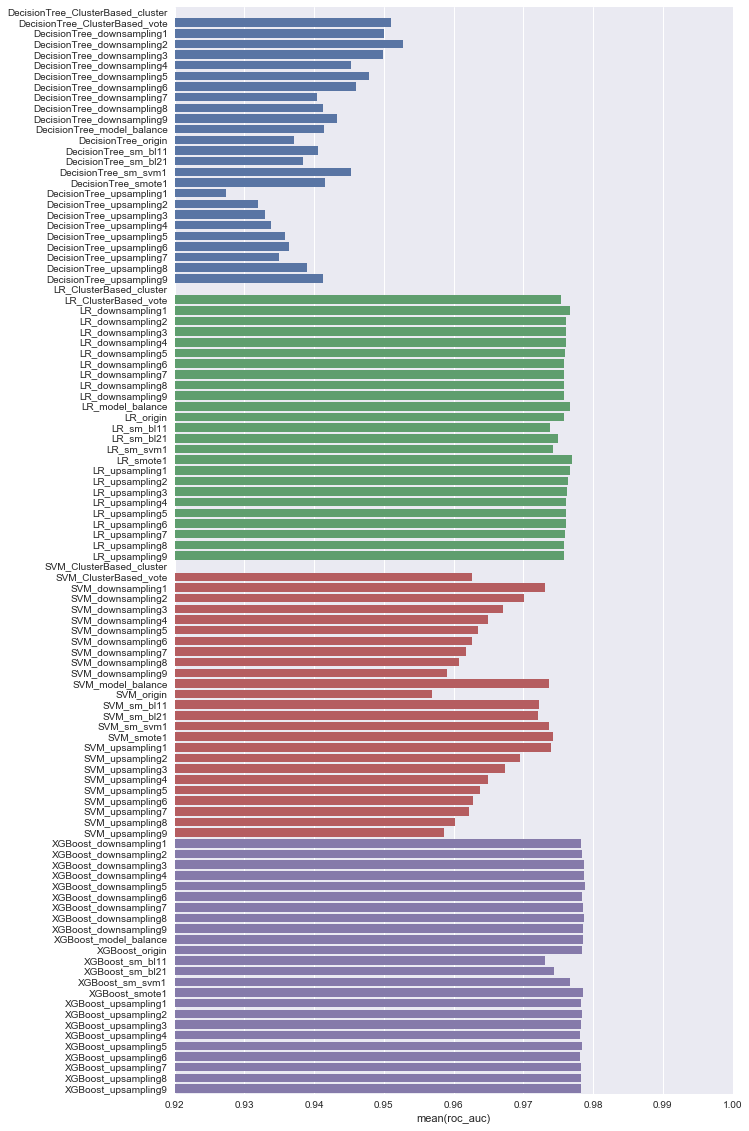

In [49]:
def get_palette(df):
    colors = sns.color_palette(n_colors=len(df))
    c_map = {}
    index = 0
    for x in df.index:
        t = x[:3]
        if t not in c_map:
            c_map[t] = index
            index += 1
    palette = np.concatenate([[colors[ c_map[x[:3]]]] for x in df.index])
    return palette

def plot_score(df, column, xlim):
    sns.plt.figure(figsize=(10, 20))
    sns.plt.xlim(xlim)
    sns.barplot(x=column, y=df.index.values, data=df, palette=get_palette(df))
    
df_overall.sort_index(inplace=True)
plot_score(df_overall, 'roc_auc', (0.92, 1))

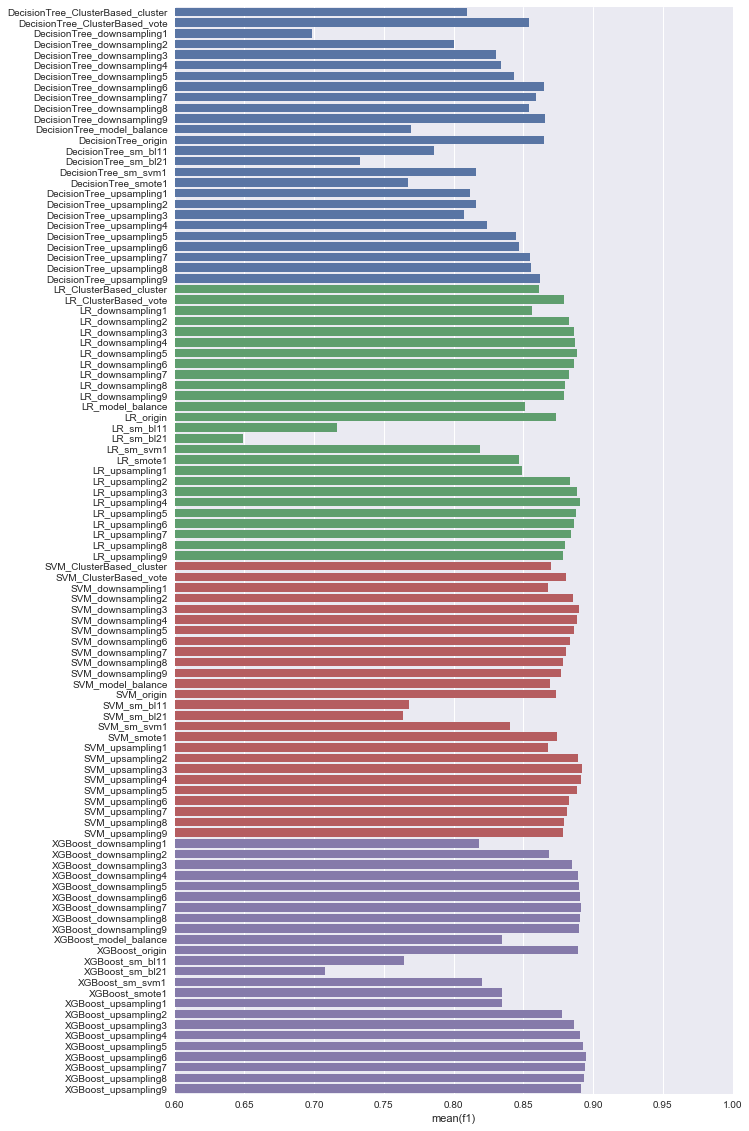

In [46]:
plot_score(df_overall, 'f1', (0.6, 1))

# Tuning

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [6]:
models_params = {
    'SVM': [
        {'kernel': ['rbf', 'poly'], 'C': [0.001, 0.01, 0.1, 1, 4, 16, 32]},
        {'gamma': [0.0075, 0.0125, 0.25]},
        {'normalizer_name': ['standard', 'minmax']},
        {'sample_method': [None, preprocess.downsampling, preprocess.upsampling], 'sample_ratio': [1/3, 1/4, 1/5]},
        {'balanced_learning': [True, False]}
    ],
    'DecisionTree': [
        {'max_depth': [None, 3, 5, 7, 9], 'sample_method': [None, preprocess.downsampling, preprocess.upsampling], 'sample_ratio': [1/4]},
        {'min_samples_split': [2, 4, 6, 8, 10, 12]},
        {'balanced_learning': [True, False]},
        {'sample_ratio': [1, 1/3, 1/4, 1/5]},
        {'normalizer_name': ['standard', 'minmax']},
    ],
    'XGBoost': [
        {'n_estimators': [50, 80, 100, 120, 180], 'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4]},
        {'max_depth': [100, 3, 5, 8, 11], 'min_child_weight': [1, 2, 4, 8, 16]},
        {'gamma': [0.0, 0.01, 0.05, 0.1, 0.2, 0.4]},
        {'n_estimators': [400, 800, 1200, 1600], 'learning_rate': [0.03, 0.05, 0.08, 0.12, 0.25]},
        {'balanced_learning': [True, False]},
        {'sample_method': [None, preprocess.downsampling, preprocess.upsampling], 'sample_ratio': [1/3, 1/4, 1/5]},
        {'normalizer_name': ['standard', 'minmax']},
    ],
    'LR': [
        {'C': [0.1, 0.5, 1.0, 2.0, 4.0, 8.0, 12.0, 16.0], 'penalty': ['l2', 'l1']},
        {'balanced_learning': [True, False]},
        {'sample_method': [None, preprocess.downsampling, preprocess.upsampling], 'sample_ratio': [1/3, 1/4, 1/5]},
        {'tol': [1e-4, 1e-3, 1e-5]},
        {'normalizer_name': ['standard', 'minmax']},
    ]
}

In [7]:
def fine_tuning():
    dict_best_params = {}
    dict_best_estimators = {}
    dict_scores = {}

    for model_name, md in models.items():
        print(model_name)
        param = models_params[model_name]
        best_param, df_score, best_estimator_ = evaluation.best_param_search(
            estimator=md(),
            params=param,
            X=X_train,
            y=y_train
        )
        dict_best_params[model_name] = best_param
        dict_best_estimators[model_name] = best_estimator_
        dict_scores[model_name] = df_score
        print(best_param)
        print()
    return dict_best_estimators, dict_best_params, dict_scores

def load_tuning_result():
    if os.path.exists('./output/results.pickle'):
        with open('./output/results.pickle', 'rb') as f:
            results = pickle.load(f)
            return results
    else:
        results = fine_tuning()
        with open('./output/results.pickle', 'wb') as f:
            pickle.dump(results, f)
        return results
    
dict_best_estimators, dict_best_params, dict_scores = load_tuning_result()

In [8]:
import warnings
warnings.filterwarnings("ignore")

-----

**DecisionTree**

the recall for this model is : 0.888235294118


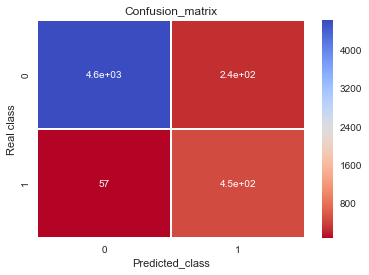


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.99      0.95      0.97      4860
          1       0.65      0.89      0.75       510

avg / total       0.96      0.94      0.95      5370



{'test': {'f1': 0.75374376039933433, 'roc_auc': 0.93713568143306702},
 'train': {'f1': 0.87114197530864201, 'roc_auc': 0.99857973960235058}}

-----

**SVM**

the recall for this model is : 0.894117647059


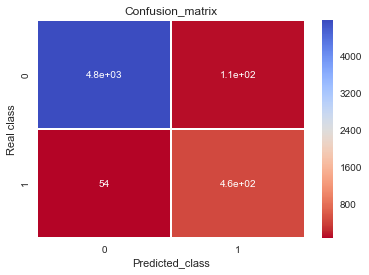


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.99      0.98      0.98      4860
          1       0.81      0.89      0.85       510

avg / total       0.97      0.97      0.97      5370



{'test': {'f1': 0.84995340167753963, 'roc_auc': 0.97884329863632702},
 'train': {'f1': 0.87526427061310774, 'roc_auc': 0.97808200508008447}}

-----

**LR**

the recall for this model is : 0.896078431373


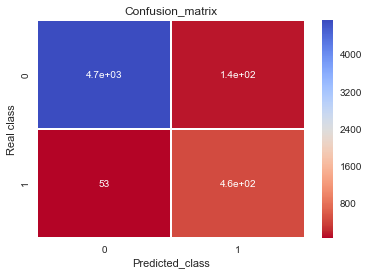


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.99      0.97      0.98      4860
          1       0.77      0.90      0.83       510

avg / total       0.97      0.96      0.97      5370



{'test': {'f1': 0.8294010889292196, 'roc_auc': 0.97607036230129907},
 'train': {'f1': 0.85407193054981401, 'roc_auc': 0.97693844603247504}}

-----

**XGBoost**

the recall for this model is : 0.860784313725


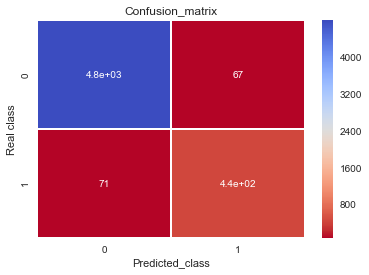


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      4860
          1       0.87      0.86      0.86       510

avg / total       0.97      0.97      0.97      5370



{'test': {'f1': 0.8641732283464566, 'roc_auc': 0.97599854756717497},
 'train': {'f1': 0.99823165340406717, 'roc_auc': 1.0}}

In [13]:
mds = []
for md_name, md in models.items():
    params = dict_best_params[md_name]
    display(Markdown("-----"))
    display(Markdown("**{}**".format(md_name)))
    scores = evaluation.estimate(md(**params), X_train, X_test, y_train, y_test, use_confusion_matrix=True)
    display(scores)

In [52]:
for name, tem in dict_scores.items():
    display(name)
    index = tem.test_score.argmax()
    display(index)
    display(tem.loc[index])

'DecisionTree'

'max_depth:5;sample_method:None;sample_ratio:0.25'

test_score     0.823585
train_score    0.858645
fit_time       0.062375
score_time     0.003170
Name: max_depth:5;sample_method:None;sample_ratio:0.25, dtype: float64

'SVM'

'C:1;kernel:rbf'

test_score     0.865553
train_score    0.878474
fit_time       5.291261
score_time     0.176287
Name: C:1;kernel:rbf, dtype: float64

'LR'

'C:1.0;balanced_learning:True;penalty:l1;sample_method:<function downsampling at 0x000001F5111A28C8>;sample_ratio:0.3333333333333333'

test_score     0.838488
train_score    0.858438
fit_time       0.018680
score_time     0.005003
Name: C:1.0;balanced_learning:True;penalty:l1;sample_method:<function downsampling at 0x000001F5111A28C8>;sample_ratio:0.3333333333333333, dtype: float64

'XGBoost'

'gamma:0.0;learning_rate:0.25;max_depth:100;min_child_weight:1;n_estimators:400'

test_score     0.890047
train_score    1.000000
fit_time       6.337639
score_time     0.028353
Name: gamma:0.0;learning_rate:0.25;max_depth:100;min_child_weight:1;n_estimators:400, dtype: float64

In [10]:
# basic
dfs_results = defaultdict(lambda: pd.DataFrame(columns=['f1', 'roc_auc']))
for name, md in models.items():
    params = dict_best_params[name]
    for _n in ['balanced_learning']:
        if _n in params:
            params.pop(_n)
            
    for use_balanced_trick in (True, False):
        result = evaluation.cross_validation(
            md(balanced_learning=use_balanced_trick, **params),
            X, y, scoring='both', n_jobs=-1)
        if use_balanced_trick:
            dfs_results['model_balance'].loc[name] = result['f1'].mean(), result['roc_auc'].mean()
        else:
            dfs_results['origin'].loc[name] = result['f1'].mean(), result['roc_auc'].mean()
            
sample_methods = {
    'smote': preprocess.get_smote('regular'),
    'sm_bl1': preprocess.get_smote('borderline1'),
    'sm_bl2': preprocess.get_smote('borderline2'),
    'sm_svm': preprocess.get_smote('svm'),
    'upsampling': preprocess.upsampling,
    'downsampling': preprocess.downsampling
}

for name, md in models.items():
    params = dict_best_params[name]
    for _n in ['balanced_learning', 'sample_method', 'sample_ratio']:
        if _n in params:
            params.pop(_n)
            
    for method_name, method in sample_methods.items():
        sample_ratios = (1, )
        if method_name.endswith('sampling'):
            sample_ratios = range(1, 10)
        for sample_ratio in sample_ratios:
            _model = md(balanced_learning=False, sample_method=method, sample_ratio=1 / sample_ratio, **params)
            result = evaluation.cross_validation(_model, X, y, scoring='both', n_jobs=-1)
            _method_name = method_name + str(sample_ratio)
            dfs_results[_method_name].loc[name] = result['f1'].mean(), result['roc_auc'].mean()

df_overall = pd.DataFrame(columns=('f1', 'roc_auc'))
for name, df in dfs_results.items():
    for i, row in df.iterrows():
        if i.startswith("LinearModel"):
            continue
        df_overall.loc[i + '_' + name] = row

KeyboardInterrupt: 

# Ensemble

In [ ]:
mds = []
for md_name, md in models.items():
    params = dict_best_params[md_name]
    mds.append(md(**params))
    if md_name != 'XGBoost':
        mds.append(md(**params))
        mds.append(md(**params))
        mds.append(md(**params))
        
scores = evaluation.estimate(md(**params), X_train, X_test, y_train, y_test, use_confusion_matrix=True)